# Local mesh refinement with exact geometry

In [1]:
import fenics
import mshr
import numpy
import matplotlib
%matplotlib inline

## Exact geometry

In [2]:
square = mshr.Rectangle(fenics.Point(0., 0.), fenics.Point(1., 1.))

c = (0.5, 0.5)

radius = 0.1

circle = mshr.Circle(fenics.Point(c[0], c[1]), radius)

geometry = square - circle

## Coarse Mesh

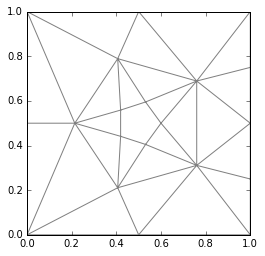

In [3]:
mesh = mshr.generate_mesh(geometry, 2)

fenics.plot(mesh)

## Refinement

We need a function to convert from Cartesian to polar coordinates.

In [4]:
def polar_coordinates(x):
    
    r = numpy.sqrt((x[0] - c[0])**2 + (x[1] - c[1])**2)
    
    theta = numpy.arctan2((x[1] - c[1]), (x[0] - c[0]))
    
    return r, theta

Refine edges bounded by the circle.

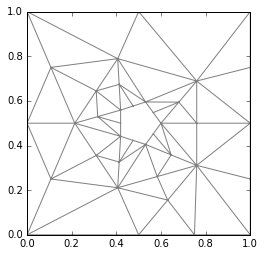

In [5]:
class CircleBoundary(fenics.SubDomain):

    def inside(self, x, on_boundary):

        r, theta = polar_coordinates(x)
        
        return on_boundary and (r <= radius)
    
edge_markers = fenics.MeshFunction("bool", mesh, 1, False)
    
CircleBoundary().mark(edge_markers, True)

fenics.adapt(mesh, edge_markers)

mesh = mesh.child()

fenics.plot(mesh)

Snap new vertices to the exact circle.

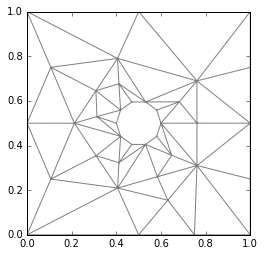

In [6]:
class Snapper(fenics.SubDomain):
    
    def snap(self, x):
        
        r, theta = polar_coordinates(x)
        
        if r >= radius:
            
            return
            
        x[0] = c[0] + radius*fenics.cos(theta)
        
        x[1] = c[1] + radius*fenics.sin(theta)
        
mesh.snap_boundary(Snapper())

fenics.plot(mesh)

Repeat the process.

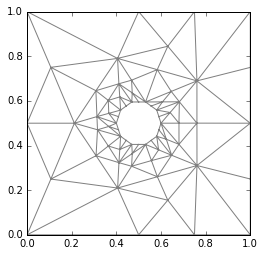

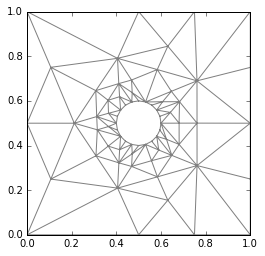

In [7]:
edge_markers = fenics.MeshFunction("bool", mesh, 1, False)
    
CircleBoundary().mark(edge_markers, True)

fenics.adapt(mesh, edge_markers)

mesh = mesh.child()

fenics.plot(mesh)

matplotlib.pyplot.show()

mesh.snap_boundary(Snapper())

fenics.plot(mesh)